In [16]:
# 共通事前處理
# 隱藏不必要的警告
import warnings
warnings.filterwarnings('ignore')

# 匯入必要的函式庫
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm

# 將字型新增到 matplotlib
fm.fontManager.addfont('./TaipeiSansTCBeta-Regular.ttf')

# 用來顯示資料框的函式
from IPython.display import display

# 調整顯示選項
# NumPy 的浮點數表示精度
np.set_printoptions(suppress=True, precision=4)
# pandas 中的浮點數表示精度
pd.options.display.float_format = '{:.4f}'.format
# 顯示資料框中的所有項目
pd.set_option("display.max_columns",None)
# 指定圖形的預設字體大小
plt.rcParams["font.size"] = 14
# 指定圖形的預設字型
plt.rcParams['font.family'] = 'Taipei Sans TC Beta'
# 隨機種子
random_seed = 2277

In [17]:
#時間序列預測模型的概念，是以週期性為前提來進行的預測
#載入、確認資料

df = pd.read_csv('Bike-Sharing-Dataset/day.csv', parse_dates=[1])
df = df.drop('instant', axis=1)
column = [
    '日期',  '季節',  '年份', '月份', '國定假日', '星期幾', '工作日', '天氣', 
    '氣溫', '體感溫度',  '濕度', '風速',
    '臨時用戶租借量', '註冊用戶租借量', '整體用戶租借量'
]
df.columns = column

display(df.head())
display(df.tail())

,日期,季節,年份,月份,國定假日,星期幾,工作日,天氣,氣溫,體感溫度,濕度,風速,臨時用戶租借量,註冊用戶租借量,整體用戶租借量
0,2011-01-01,1,0,1,0,6,0,2,0.3442,0.3636,0.8058,0.1604,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.3635,0.3537,0.6961,0.2485,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.1964,0.1894,0.4373,0.2483,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.2000,0.2121,0.5904,0.1603,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.2270,0.2293,0.4370,0.1869,82,1518,1600


,日期,季節,年份,月份,國定假日,星期幾,工作日,天氣,氣溫,體感溫度,濕度,風速,臨時用戶租借量,註冊用戶租借量,整體用戶租借量
726,2012-12-27,1,1,12,0,4,1,2,0.2542,0.2266,0.6529,0.3501,247,1867,2114
727,2012-12-28,1,1,12,0,5,1,2,0.2533,0.2550,0.5900,0.1555,644,2451,3095
728,2012-12-29,1,1,12,0,6,0,2,0.2533,0.2424,0.7529,0.1244,159,1182,1341
729,2012-12-30,1,1,12,0,0,0,1,0.2558,0.2317,0.4833,0.3508,364,1432,1796
730,2012-12-31,1,1,12,0,1,1,2,0.2158,0.2235,0.5775,0.1548,439,2290,2729


In [18]:
#預處理資料
# #Prophet演算法規定訓練資料輸入變數的個是必須是資料框df，且日期:ds、目標變數:y

#只提取日期與註冊用戶租借量，將換行名建立資料框df2
df2 = df.copy()
df2 = df2[['日期', '註冊用戶租借量']]
df2.columns = ['ds', 'y']

display(df2.head())

,ds,y
0,2011-01-01,654
1,2011-01-02,670
2,2011-01-03,1229
3,2011-01-04,1454
4,2011-01-05,1518


In [19]:
#分割資料，用2012-11-1作為分界線
mday = pd.to_datetime('2012-11-1')

train_index = df2['ds'] < mday
test_index = df2['ds'] >= mday

x_train, x_test = df2[train_index], df2[test_index]

#分割日齊資料(用於繪製圖形)
dates_test = df2['ds'][test_index]

In [20]:
#選擇演算法(使用prophet)
from prophet import Prophet
m1 = Prophet(
    yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False, seasonality_mode='multiplicative'
    )


In [21]:
#訓練，可用Prophet的fit來做訓練
m1.fit(x_train)

#預測
#建出預測用的資料框
#61為欲預測的天數(2012-11-1到2012-12-31)
future_m1 = m1.make_future_dataframe(periods=61, freq='D')

display(future_m1.head())
display(future_m1.tail())

22:07:21 - cmdstanpy - INFO - Chain [1] start processing
22:07:21 - cmdstanpy - INFO - Chain [1] done processing


,ds
0,2011-01-01
1,2011-01-02
2,2011-01-03
3,2011-01-04
4,2011-01-05


,ds
726,2012-12-27
727,2012-12-28
728,2012-12-29
729,2012-12-30
730,2012-12-31


In [22]:
#預測
fcst1 = m1.predict(future_m1)

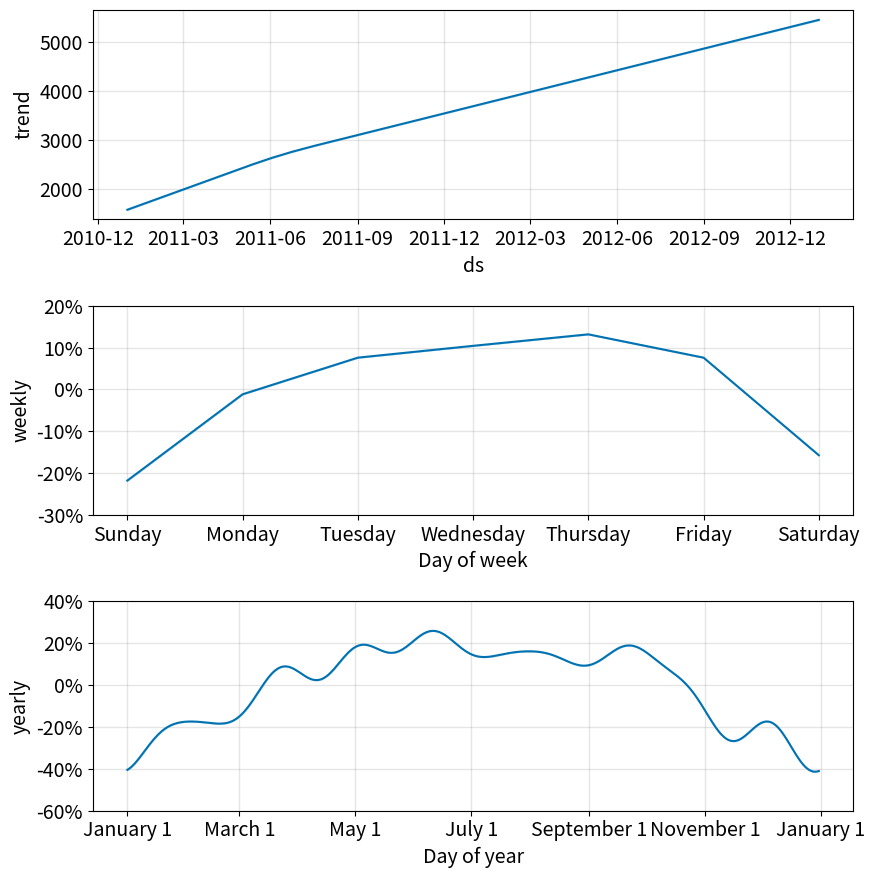

In [23]:
#評估繪製元素的圖形
#現階段為趨勢、週循環及年循環
fig = m1.plot_components(fcst1)
plt.show()